In [1]:
"""

    CfHA Parsing-Heliophysics-data
    Written by: Megan T. Powers 
    For Birmingham City University
    12/09/2022

"""

"""
    The first stage in construcing the model is in pre-processing the text corpus. 
    As a result, Beautiful Soup is imported for pre-processing text.
    
"""
import bs4 as bs
import urllib.request 

# Create a default blank string to hold the text corpus
article_text = ''


# Open the source file in order to read from it, ensure that it is properly shortened
# using truncation so that unnecessary extra words are not appended to the storage files.

# DO: Either replace the file path in /Users/meganpowers/Desktop/HeliophysicsDataTrain.txt
# with a hard-coded file path or the path held in train_data

with open('/Users/meganpowers/Desktop/HeliophysicsDataTrain.txt') as f:
    article_text = f.read()

    
# DO: Put the name of the file that will be written to by the train_data file.

data_set = input("Enter the file path of the source dataset file.")

# DO: Replace the file path /Users/meganpowers/Desktop/HeliophysicsDataset.txt
# with a hard-coded file path in your own environment or 
# the file path specified by data_set

    
file = open('/Users/meganpowers/Desktop/HeliophysicsDataset.txt', 'w')
file.truncate(0)
file.write(article_text)
file.close()

# Let the user know that the text has been parsed. 

print('Text has been successufully parsed!')

Text has been successufully parsed!


In [2]:
# NLTK, the Natural Language ToolKit, is imported for further text pre-processing.

import nltk

# The first stage in pre-processing is tokenization - splitting the text corpus into
# unique words, or 'tokens'

# DO: Replace the file path /Users/meganpowers/Desktop/HeliophysicsDataset.txt
# with a hard-coded file path in your own environment or 
# the file path specified by data_set

with open('/Users/meganpowers/Desktop/HeliophysicsDataset.txt') as f:
  contents = f.read()
corpus = nltk.sent_tokenize(contents)

f.close()

In [3]:
# re is a Regular Expression (RegEx) library, used for pattern matching.
# This serves to eliminate unnecessary punctuation, short words, and other
# noise from the text corpus.

import re

for i in range(len(corpus )):
  corpus[i] = corpus [i].lower()
  corpus[i] = re.sub(r'\W',' ',corpus[i])
  corpus[i] = re.sub(r'\s+',' ',corpus[i])
  shortword = re.compile(r'\W*\b\w{1}\b') # remove short words
  corpus[i] = re.sub(shortword,' ',corpus[i])


In [4]:
# The NLTK tokenizer is applied to the corpus to split it into distinct words.

corpus = nltk.word_tokenize(contents)

In [5]:
# Stopwords are words that link between sentences - for example, pronouns,
# posessives, and comparatives. They are not needed for Named Entity Recognition,
# so the default stopwords from NLTK are imported so that they can be identified in
# the text corpus.

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
# A list of stopwords is identified so that they can be cleaned from the dataset.

stop_words = set(stopwords.words('english')) 


# DO: Replace /Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt with 
# a local filepath or the variable dataset_cleaned

dataset_cleaned = input("Enter the name of the cleaned dataset.")


fileClean = open('/Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt', 'a') 
fileClean.truncate(0)

# Here, the tokens are checked to ensure that they are alphanumeric. 
# If they are, they are joined to the cleaned file. 

for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        token = ''.join([i for i in token if i.isalnum()]) 
        if not token in stop_words: #remove stopwords
            fileClean.write(" "+token) # save the cleaned text in a new file
fileClean.close()

In [7]:
# Here, additional pre-processing modules are imported. 

# Stemming refers to the process of checking word stems, or 
# reducing words to their base components - for example,
# logical -> logic

from nltk.stem import PorterStemmer

# Lemmatizing groups together inflected forms of a word so that they
# can be analysed as a single entity.

from nltk.stem import WordNetLemmatizer

# Numpy has support for large matrices as well as mathematical functions

import numpy as np
import nltk


In [8]:
# DO: Replace /Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt with 
# a local filepath or the variable dataset_cleaned

with open('/Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt') as f:
  contents = f.read()
tokens = nltk.word_tokenize(contents)


# Here, the stemming process is applied to the cleaned heliophysics text corpus.
# The text is facilitate to optimise the stemming process by turning the text
# to a numerical form.

porter=PorterStemmer()
stem_words = np.vectorize(porter.stem)
stemed_text = ' '.join(stem_words(tokens))
print(f"nltk stemed text: {stemed_text}")

# Here, the lemmatizing process is applied to the cleaned heliophysics text corpus.
# The text is vectorized to facilitate the lemmatizing process by turning the text
# to a numerical form.

wordnet_lemmatizer = WordNetLemmatizer()
lemmatize_words = np.vectorize(wordnet_lemmatizer.lemmatize)
lemmatized_text = ' '.join(lemmatize_words(tokens))
print(f"nltk lemmatized text: {lemmatized_text}")

f.close()


# Here, the text pre-processing concludes.

nltk stemed text: bibcod 2020georl 4785782z abstract equilibrium climat sensit global surfac temperatur respons co2 doubl persist uncertain recent consensu place like within 1545 k global climat model gcm attempt repres relev physic process provid direct mean estim climat sensit via co2 quadrupl experi here show close relat effect climat sensit increas substanti coupl model intercomparison project phase 6 cmip6 valu span 1856 k across 27 gcm exceed 45 k 10 thi statist insignific increas primarili due stronger posit cloud feedback decreas extratrop low cloud coverag albedo both tie physic represent cloud cmip6 model lead weaker respons extratrop low cloud cover water content unforc variat surfac temperatur establish plausibl higher sensit model imper given impli societ ramif titl caus higher climat sensit cmip6 model bibcod 2020georl 4787978b abstract spaceborn no2 column observ two highresolut instrument tropospher monitor instrument tropomi board sentinel5 precursor ozon monitor instr

nltk lemmatized text: bibcode 2020GeoRL 4785782Z abstract Equilibrium climate sensitivity global surface temperature response CO2 doubling persistently uncertain Recent consensus place likely within 1545 K Global climate model GCMs attempt represent relevant physical process provide direct mean estimating climate sensitivity via CO2 quadrupling experiment Here show closely related effective climate sensitivity increased substantially Coupled Model Intercomparison Project phase 6 CMIP6 value spanning 1856 K across 27 GCMs exceeding 45 K 10 This statistically insignificant increase primarily due stronger positive cloud feedback decreasing extratropical low cloud coverage albedo Both tied physical representation cloud CMIP6 model lead weaker response extratropical low cloud cover water content unforced variation surface temperature Establishing plausibility higher sensitivity model imperative given implied societal ramification title Causes Higher Climate Sensitivity CMIP6 Models bibcode 

In [9]:
"""
    The next leg of the model is the Named Entity Recognition (NER) stage. 
    Here, Spacy is used in order to facilitate the NER process. 

"""

# The Spacy module is imported alongside displacy, which is a dependency visualiser. 
import spacy
from spacy import displacy

"""
nlp=spacy.blank("en")
sp = spacy.load('en_core_web_sm')
"""


# Here, a NLP model needs to be imported. In this case, the model is built on top of the
# default pre-trained English model.

nlp = spacy.load("en_core_web_sm")

sp = spacy.load('en_core_web_sm')

# This code provides a demonstration of the Part of Speech (PoS) tagging feature
# of the default Spacy model. It is visualised using displacy.

sen = nlp(u"Action items: Ryan : create image of process of domain modeling from CfHA KT for the paper Ryan : resolve marginalia notes in overleaf All : propose the KG-related citations that have been most influential and insightful in your experience and reference them in the paper Ryan : lead a discussion on the paper with the CfHA KT and share to get their feedbac Edlira : put visuals into Overleaf doc Megan , Swapnali : Share draft proposed work for MS Find out due dates for NSF and EPA SBIRs All : Complete all existing actions for the paper by Friday June 24 Edlira : make sure introduction and methodology are consistent")
displacy.render(sen, style='dep', jupyter=True, options={'distance': 85})

In [13]:
# In this stage, the default Spacy model needs to be trained on 
# data that is relevant to the CfHA/heliophysics domain.

# First, relevant libraries are imported for training the 
# default model. This is done by creating a pipeline 
# that will update the NER aspect of the model 
# by using batches of training data.

import random
from spacy.training import Example
from spacy.util import minibatch, compounding
from pathlib import Path
from spacy.pipeline import EntityRuler



# Here, a pipe is created for NER specifically to add the training data to the model.
# The new NER labels are based off categories found in the CfHA ontology, and 
# are added to the ner model.

# DO: Specify any additional labels that are relevant to the text corpus 
# being used


ner = nlp.create_pipe("ner")
ner.add_label("ASTROPHYSICS")
ner.add_label("HELIOPHYSICS")
ner.add_label("MISSION")
ner.add_label("PROJECT")
ner.add_label("PAPER")




# Here, we need to provide a training data corpus where entities are already tagged.
# This data will provide the NER model with example entities to base itself off of.


# DO: feed in appropriate training data from a source corpus, and tag example entities
# with their labels and starting and ending index in the text.


TRAIN_DATA = [
    ("Edlira: put visuals into Overleaf doc", {"entities": [(0, 6, "PERSON"), (25, 33, "ORG")]}),
    ("Ryan: review the abstract", {"entities": [(0, 4, "PERSON")]}),
    ("Ellie: improve figures she provided", {"entities": [(0, 5, "PERSON")]}),
    ("Edlira: provide descriptions of new figures you provided and make sure they are addressed in the text", {"entities": [(0, 6, "PERSON")]}),
    ("Ellie and Ryan: offer feedback to Swapnali MS project proposal", {"entities": [(0, 5, "PERSON"), (10, 14, "PERSON"), (34, 42, "PERSON")]}),
    ("Megan and Swapnali: set up weekly meetings for MS projects", {"entities": [(0, 5, "PERSON"), (10,18, "PERSON")]}),
    ("Swapnali and Megan in middle of MS work (until September)", {"entities": [(0, 8, "PERSON"), (13,18, "PERSON")]}),
    ("Edlira, Megan and Swapnali: update ontology and provide interesting axioms (novel)", {"entities": [(0, 6, "PERSON"), (8,13, "PERSON"), (18,26, "PERSON")]}),
    ("Megan and Swapnali: set up weekly meetings for MS projects", {"entities": [(0, 5, "PERSON"), (10,18, "PERSON")]}),
    ("Semantic Web Journal paper types: http://www.semantic-web-journal.net/reviewers", {"entities": [(0, 20, "ORG")]}),
    ("Megan and Swapnali to update methodology+figures based on our last discussion (does this also result in a change to the results section of the paper?)", {"entities": [(0, 5, "PERSON"), (10, 18, "PERSON")]}),
    ("Host in Github for our group (CfHA)", {"entities": [(8, 14, "ORG"), (30, 35, "ORG")]}),
    ("CfHA Knowledge Team Running Notes: https://docs.google.com/document/d/1R4DCc5bs9R-uczF9Jy-b7TSbGSfkMNkjMCL_xNCeTMs/edit?usp=sharing", {"entities": [(0, 4, "ORG")]}),
    ("CfHA Miro: https://miro.com/app/board/o9J_klKaKEg=/", {"entities": [(0, 4, "ORG")]}),
    ("I've rewritten the intro and kept the description of CfHA unchanged", {"entities": [(53, 57, "ORG")]}),
    ("Add the visuals from Megan and Swapnali ", {"entities": [(21, 26, "PERSON"), (31,19, "PERSON")]}),
    ("Megan and Swapnali [k]: provide v1.0 visuals for the paper ", {"entities": [(0, 5, "PERSON"), (10,18, "PERSON")]}),
    ("Giant impacts dominate the final stages of terrestrial planet formation and set the configuration and compositions of the final system of planets.", {"entities": [(55, 61, "ASTROPHYSICS")]}),
    ("The impact of gravity waves GW on diurnal tides and the global circulation in the middle/upper atmosphere of Mars is investigated using a general circulation model GCM.", {"entities": [(14, 28, "ASTROPHYSICS"), (34, 48, "ASTROPHYSICS"), (109, 114, "ASTROPHYSICS")]}),
    ("Separate populations were accelerated above the Io torus and at high latitudes near Jupiter", {"entities": [(48, 51, "ASTROPHYSICS"),(84, 92, "ASTROPHYSICS")]}),
    ("BepiColombo, a joint mission to Mercury by the European Space Agency and Japan Aerospace Exploration Agency, will address remaining open questions using two spacecraft, Mio and the Mercury Planetary Orbiter.", {"entities": [(0, 11, "MISSION"), (32, 39, "ASTROPHYSICS"), (47, 68, "ORG"), (74, 107, "ORG"), (169, 172, "MISSION"), (181, 206, "MISSION")]}),
    ("Mio First Comprehensive Exploration of Mercury's Space Environment: Mission Overview", {"entities": [(0, 85, "PAPER")]}),
    ("Martian Thermospheric Warming Associated With the Planet Encircling Dust Event of 2018", {"entities": [(0, 86, "PAPER")]}),
    ("Ray-and-power tracing provided wave amplitudes as well as trajectories and wave normal angles throughout the plasmasphere.", {"entities": [(31, 46, "ASTROPHYSICS"), (109, 121, "ASTROPHYSICS")]}),
    ("Dynamical Evolution of Simulated Particles Ejected From Asteroid Bennu", {"entities": [(0, 70, "PAPER")]}),
    ("We use global and local hybrid kinetic ions and fluid electrons simulations to investigate the conditions under which foreshock bubbles FBs form and how their topology changes with solar wind conditions.", {"entities": [(48, 58, "ASTROPHYSICS")]}),
    ("FBs form as a result of the interaction between solar wind discontinuities and backstreaming ion beams in the foreshock.", {"entities": [(48, 58, "ASTROPHYSICS"), (93, 97, "ASTROPHYSICS")]}),
    ("The visible and near-infrared imaging spectrometer on board the Yutu-2 rover of ChangE-4 mission has conducted 2 sets of spectrophotometric measurements at two sites on its 10th lunar day.", {"entities": [(38, 51, "ASTROPHYSICS"), (64, 71, "PROJECT"), (80, 89, "MISSION")]}),
    ("The Mars Science Laboratory mission investigated Vera Rubin ridge, which bears spectral indications of elevated amounts of hematite and has been hypothesized as having a complex diagenetic history.", {"entities": [(4, 36, "MISSION"), (49, 60, "ASTROPHYSICS")]}),
    ("The InSight mission to Mars landed within Homestead hollow on an Early Amazonian lava plain.", {"entities": [(4, 20, "MISSION"), (23, 28, "ASTROPHYSICS"), (42, 52, "ASTROPHYSICS"), (81, 91, "ASTROPHYSICS")]}),
    ("The many completed studies show an Ice Giant mission with an in situ probe is feasible and would be welcomed by the international science community.", {"entities": [(35, 53, "MISSION")]}),
    ("NASA Parker Solar Probe mission is currently investigating the local plasma environment of the inner heliosphere &lt;0.25 R<SUB>\u2609</SUB> using both in situ and remote sensing instrumentation.", {"entities": [(0, 5, "ORG"), (5, 32, "MISSION"), (69, 76, "HELIOPHYSICS"), (101, 113, "HELIOPHYSICS")]}),
    ("We will relate the results of the Rosetta mission to those of the flybys.", {"entities": [(34, 50, "MISSION")]}),
    ("Cometary Nuclei: From Giotto to Rosetta", {"entities": [(0, 40, "PAPER")]}),
    ("A Maximum Rupture Model for the Southern San Andreas and San Jacinto Faults, California, Derived From Paleoseismic Earthquake Ages: Observations and Limitations", {"entities": [(0, 161, "PAPER")]}),
    ("The CESM2 is the version of the CESM contributed to the sixth phase of the Coupled Model Intercomparison Project CMIP6.", {"entities": [(4, 10, "PROJECT"), (32, 37, "PROJECT"), (75, 113, "PROJECT")]}),
    ("The datasets of two Ocean Model Intercomparison Project simulation experiments from the Climate Ocean Model Project, forced by two different sets of atmospheric surface data, are described in this paper.", {"entities": [(20, 56, "PROJECT"), (89, 116, "PROJECT")]}),
    ("Model simulations in the Community Earth System Model Large Ensemble Project confirmed the physical connection between the warm CEP SST anomaly and the drought in EC.", {"entities": [(25, 77, "PROJECT")]}),
    ("The pickup process on the extended oxygen corona created by the strong EUV flux contributes to the total O+ loss.", {"entities": [(42, 49, "HELIOPHYSICS")]}),
    ("As systems become more complex over time, the impacts of space weather on space flights and humanity in general are likely to increase.", {"entities": [(57, 71, "ASTROPHYSICS"), (74, 88, "MISSION")]}), 
    ("Humans will encounter extremely serious problems of space flight safety at the beginning of new phase of the Moon exploration.", {"entities": [(52, 65, "MISSION"), (109, 114, "ASTROPHYSICS")]}),
    ("Motivated by a successful prediction on the peak of solar cycle 24 81.7, comparable to the observed 81.9, Du in Astrophys.", {"entities": [(52, 64, "HELIOPHYSICS")]}),
    ("The pickup process on the extended oxygen corona created by the strong EUV flux contributes to the total O+ loss.", {"entities": [(42, 49, "HELIOPHYSICS")]}),
    ("Such plasma is composed by the generalized distributed electrons, Boltzmann distributed positrons and relativistic warm ions.", {"entities": [(5, 12, "ASTROPHYSICS"), (31, 65, "ASTROPHYSICS"), (66, 98, "ASTROPHYSICS"), (102, 125, "ASTROPHYSICS")]}),
    ("A new 1.5 m diameter impact crater was discovered on Mars only ~40 km from the InSight lander.", {"entities": [(21, 35, "ASTROPHYSICS"), (53, 58, "ASTROPHYSICS"), (79, 94, "MISSION")]}),
    ("In this study, we investigate systematically the variations of the occurrence of depletions with both internal and external conditions, using the extensive Solar Wind Electron Analyzer measurements made on board the Mars Atmosphere and Volatile Evolution.", {"entities": [(156, 185, "MISSION"), (216, 255, "MISSION")]}),
    ("Comparisons Between Jupiter's X-ray, UV and Radio Emissions and In-Situ Solar Wind Measurements During 2007.", {"entities": [(0, 108, "PAPER")]}),
    ("The final angular momentum, set by the timing of quasi-resonance escape, is a function of the ratio of tidal strength in the Moon and Earth and the absolute rate of tidal dissipation in the Earth.", {"entities": [(125, 130, "ASTROPHYSICS"), (134, 140, "ASTROPHYSICS"), (165, 183, "ASTROPHYSICS"), (190, 196, "ASTROPHYSICS")]}),
    ("We use an ensemble of simulations of the Goddard Institute for Space Studies Earth system model to compute climate response functions CRFs for the addition of meltwater.", {"entities": [(41, 77, "ORG"), (77, 96, "PROJECT"), (107, 134, "ASTROPHYSICS")]}),
    ("We infer that these clouds formed as a result of semidiurnal thermal tides.", {"entities": [(49, 75, "ASTROPHYSICS")]}),
    ("Magma Oscillations in a Conduit-Reservoir System, Application to Very Long Period (VLP) Seismicity at Basaltic Volcanoes: 2. Data Inversion and Interpretation at Kilauea Volcano", {"entities": [(0, 178, "PAPER")]}),
    ("The German Aerospace Center is currently developing the Reusability Flight Experiment.", {"entities": [(4, 28, "ORG"),(56, 86, "PROJECT")]}),
    ("Results demonstrate that the Iexp mainly improved the model outputs with respect to assimilation-free Massachusetts Institute of Technology General Circulation Model run in the first few months,", {"entities": [(29, 34, "PROJECT"),(102, 140, "ORG"),(140, 166, "PROJECT")]}),
    ("Characteristics of Minor Ions and Electrons in Flux Transfer Events Observed by the Magnetospheric Multiscale Mission", {"entities": [(0, 118, "PAPER")]}),
    ("Eddies were identified and tracked within a numerical simulation that used the Massachusetts Institute of Technology general circulation model and an eddy characterization algorithm.", {"entities": [(79, 117, "ORG")]}),
    ("Our results suggest that the electron precipitation through the polar rain can be a main energy source of the polar wind during periods of high levels of solar activity.", {"entities": [(29, 52, "HELIOPHYSICS"),(64, 75, "HELIOPHYSICS"), (110, 121, "HELIOPHYSICS"), (154, 169, "HELIOPHYSICS")]}),
    ("Causes of Higher Climate Sensitivity in CMIP6 Models", {"entities": [(0, 53, "PAPER")]}),
    ("The Flux-Anomaly-Forced Model Intercomparison Project is an endorsed Model Intercomparison Project in phase 6 of the Coupled Model Intercomparison Project.", {"entities": [(4, 54, "PROJECT"),(69, 99, "PROJECT"),(117, 155, "PROJECT")]}),
    ("The National Aeronautics and Space Administration is currently developing the next generation of spacesuits for use in future exploration missions.", {"entities": [(4, 50, "ORG")]}),
    ("The National Aeronautics and Space Administration Earth Observing System Global Circulation Project is evaluated through a cascade of simulations.", {"entities": [(4, 50, "ORG"),(50, 100, "PROJECT")]}),
    ("Testing of the method on observations under various conditions in the solar wind confirms the reliability and accuracy of the method.", {"entities": [(70, 81, "HELIOPHYSICS")]}),
    ("These predictions may serve as a reference for eventual ionospheric measurements of multiple instruments and are leading to a better understanding of the ionospheric response to solar eclipses.", {"entities": [(56, 81, "HELIOPHYSICS"),(154, 175, "HELIOPHYSICS"), (178, 193, "HELIOPHYSICS")]}),
]


# Here is the actual training portion. For every training sentence and annotated entity in
# TRAIN_DATA, these examples will be appended to the NER model. Randomisation is employed
# to ensure that the model does not overfit, and to avoid the Catastrophic Forgetting 
# Problem where already-learned labels are forgotten.

examples = []
for text, annots in TRAIN_DATA:
    examples.append(Example.from_dict(nlp.make_doc(text), annots))
"""nlp.initialize(lambda: examples)"""
for i in range(40):
    random.shuffle(examples)
    for batch in minibatch(examples, size=8):
        nlp.update(batch)
        sp.update(batch)


        

These predictions may serve as a reference for eventual ionospheric measurements of multiple instruments and are leading to a better unders


In [14]:
from spacy.training import Example


# Now, some testing validation data needs to be created. This test data is
# annotated like the training data, and evaluation metrics are employed
# in order to determine the success of the NER model for identifying entities.

new_test_data = []

# DO: Create example validation data similar to the creation of test data.


test_data = [
    ("Mio First Comprehensive Exploration of Mercury's Space Environment: Mission Overview", {"entities": [(0, 85, "PAPER")]}),
    ("Martian Thermospheric Warming Associated With the Planet Encircling Dust Event of 2018", {"entities": [(0, 86, "PAPER")]}),
    ("To do this, three grids were generated that span the entire, two thirds, and one third of the North Pacific and evaluated for a 30-year climatology using Atmospheric Model Intercomparison Project protocols.",{"entities":[(154,196,"PROJECT")]}),
    ("Although the existence of an intrinsic magnetic field on ancient Mars is also a key factor in ion loss, its effect remains unclear.", {"entities": [(39, 54, "ASTROPHYSICS"), (65, 70, "ASTROPHYSICS"), (94, 98, "ASTROPHYSICS")]}), 
    ("These indices are a well proxy for the ionospheric fluctuations and can be used to describe features of plasma bubble irregularities.", {"entities": [(39, 64, "ASTROPHYSICS"), (104, 111, "ASTROPHYSICS")]}), 
    ("Cosmic radiation hazard is cornerstone of space flights safety.", {"entities": [(0, 17, "ASTROPHYSICS")]}),
    ("Solar flares and GCR are of special concern.", {"entities": [(0, 6, "HELIOPHYSICS"), (17, 21, "HELIOPHYSICS")]}),
    ("Altogether, it is referred to as space weather.", {"entities": [(52, 65, "MISSION"), (34, 47, "ASTROPHYSICS")]}),
    ("In this study, we investigate systematically the variations of the occurrence of depletions with both internal and external conditions, using the extensive Solar Wind Electron Analyzer measurements made on board the Mars Atmosphere and Volatile Evolution.", {"entities": [(156, 185, "MISSION"), (216, 255, "MISSION")]}),
    ("However, the brightest X-ray aurora was coincident with a magnetosphere expansion.", {"entities": [(23, 36, "ASTROPHYSICS"), (58, 72, "ASTROPHYSICS")]}),
    ("The diurnal cycle and orographic forcing, however, substantially enhance rainfall in the seas surrounding the islands.", {"entities": [(4, 18, "ASTROPHYSICS"), (22, 41, "ASTROPHYSICS")]}),
    ("Coobservations of four meteor trails trains from the Long Wavelength Array telescope in New Mexico and the Widefield Persistent Train WiPT camera associate the long-lasting tens of seconds, self-generated radio emission known as MRAs with the long-lasting tens of minutes optical emissions known as PTs.", {"entities": [(23, 30, "ASTROPHYSICS"), (53, 85, "PROJECT"), (107, 141, "PROJECT"), (200, 215, "ASTROPHYSICS"), (224, 229, "ASTROPHYSICS"), (267, 285, "ASTROPHYSICS"), (294, 298, "ASTROPHYSICS") ]}),
    ("Altogether, it is referred to as space weather.", {"entities": [(52, 65, "MISSION"), (34, 47, "ASTROPHYSICS")]}),
    ("Moreover, this new methodology is validated by setting up an experimental campaign performed in the Von Karman Institute Longshot wind tunnel.", {"entities": [(100, 121, "ORG")]}),
    ("The electric solar wind sail is a propulsion system that extracts the solar wind momentum for the thrust force of a spacecraft by using an interaction between solar wind protons and the electric potential structure around charged conducting tethers.", {"entities": [(4, 29, "ASTROPHYSICS"), (70, 81, "ASTROPHYSICS"), (159, 178, "ASTROPHYSICS"), (186, 215, "ASTROPHYSICS"), (230, 259, "ASTROPHYSICS")]}),
    ("The predicted ionosphere vertical TEC and the critical frequency are validated by the Massachusetts Institute of Technology and Global Ionosondes Network, respectively.", {"entities": [(0, 17, "ASTROPHYSICS")]}),
    ("These FTEs were observed just upstream of the Earth postnoon magnetopause by the National Aeronautics and Space Administration Magnetospheric Multiscale spacecraft constellation.", {"entities": [(6, 11, "ASTROPHYSICS"), (46, 52, "ASTROPHYSICS"), (52, 74, "ASTROPHYSICS"), (81, 127, "ORG"), (127, 153, "PROJECT")]}),
    ("The predicted ionosphere vertical TEC and the critical frequency are validated by the Massachusetts Institute of Technology and Global Ionosondes Network, respectively.", {"entities": [(0, 17, "ASTROPHYSICS")]}),
    ("Solar radiation showed an observable influence on surface O3 concentrations in the lower troposphere.", {"entities": [(0, 16, "HELIOPHYSICS")]}),
    ("We perform a statistical study with thousands of hours of magnetospheric multiscale observations in the solar wind, comparing the prediction accuracy of the multispacecraft monitor to all of the OMNIWeb single-spacecraft monitors.", {"entities": [(58, 97, "HELIOPHYSICS"),(106, 115, "HELIOPHYSICS"),(157, 181, "PROJECT"),(195, 203, "PROJECT")]}),
    ("We use an ensemble of simulations of the Goddard Institute for Space Studies Earth System Model Project to compute climate response functions for the addition of meltwater.", {"entities": [(41, 77, "ORG"), (77, 104, "PROJECT")]}),
]
     
# Here, new test data is being extracted from the test data in order to perform
# an evaluation on the new test data. This is done by using an Example,
# which is a type of class in Spacy that holds information for a training instance.

for text, annots in test_data:
    new_test_data.append(Example.from_dict(nlp.make_doc(text), annots))

#end formatted test data

# Using the evaluate function, the evaluation is performed on the new test data.
scores_model = nlp.evaluate(new_test_data)

# Here, relevant evaluation metrics are used. In this case, Precision, Recall, the F-Score,
# and a breakdown of scores by entities are formulated and displayed.
precision_model1 = scores_model["token_acc"]
precision_model = scores_model["ents_p"]
recall_model = scores_model["ents_r"]
f_score_model = scores_model["ents_f"]
scores_entities = scores_model["ents_per_type"]


print(precision_model1)
print(precision_model)
print(recall_model)
print(f_score_model)
print(scores_entities)


Atmospheric Model Intercomparison Project
1.0
1.0
0.6666666666666666
0.8
{'PAPER': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'PROJECT': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'LOC': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'PRODUCT': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'MISSION': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'ASTROPHYSICS': {'p': 0.0, 'r': 0.0, 'f': 0.0}}


In [15]:
"""
    Testing accuracy metrics on an untrained en_core_web_sm model

"""

# DO: Put labels corresponding to the training data

nlp_untrained = spacy.load("en_core_web_sm")
ner_untrained = nlp_untrained.create_pipe("ner")
ner_untrained.add_label("ASTROPHYSICS")
ner_untrained.add_label("HELIOPHYSICS")
ner_untrained.add_label("MISSION")
ner_untrained.add_label("PROJECT")
ner_untrained.add_label("PAPER")


# Using the evaluate function, the evaluation is performed on the new test data.
scores_model_untrained = nlp_untrained.evaluate(new_test_data)

precision_model1_untrained = scores_model_untrained["token_acc"]
precision_model_untrained = scores_model_untrained["ents_p"]
recall_model_untrained = scores_model_untrained["ents_r"]
f_score_model_untrained = scores_model_untrained["ents_f"]
scores_entities_untrained = scores_model_untrained["ents_per_type"]


print(precision_model1_untrained)
print(precision_model_untrained)
print(recall_model_untrained)
print(f_score_model_untrained)
print(scores_entities_untrained)


1.0
0.0
0.0
0.0
{'ORG': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'PAPER': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'CARDINAL': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'LOC': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'DATE': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'PRODUCT': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'MISSION': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'ASTROPHYSICS': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'GPE': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'TIME': {'p': 0.0, 'r': 0.0, 'f': 0.0}}


In [16]:
"""

    The next stage of the process is using the trained and evaluated NER model to 
    extract Named Entities (NEs). 
"""

# Import relevant libraries to extract Named Entities (NEs)
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
"""nlp = spacy.load('en_core_web_sm')"""

# Of particular note is importing the matcher and span in order to
# pattern match using Part of Speech tokens, and Span to create
# Span objects for storing slices

from spacy.matcher import Matcher 
from spacy.tokens import Span 

# For creating the Knowledge Graph

import networkx as nx

# For plotting data
import matplotlib.pyplot as plt

# For displaying a loading bar
from tqdm import tqdm


#Open the cleaned text file

# DO: Replace /Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt with 
# a local filepath or the variable dataset_cleaned

with open('/Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt') as f:
  contents = f.read()


#file to store the NER result


dataset_ner = input("Enter the file path of the file that saves the NER values.")

# DO: Replace /Users/meganpowers/Desktop/HeliophysicsDataset_NER.txt with 
# a local filepath or the variable dataset_ner


fileNER = open('/Users/meganpowers/Desktop/HeliophysicsDataset_NER.txt', 'a')
fileNER.truncate(0)

# For every entity that the NER identified, display the entity itself, the assigned label,
# and the explanation associated with the label. Write the labels to the 
# HeliophysicsDataset_NER.txt file

for entity in sp(contents).ents:
  print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))
  fileNER.write(entity.text +'\n')
f.close()
fileNER.close()

Coupled Model Intercomparison Project phase - PROJECT - None
K - MISSION - None
Spaceborne - PERSON - People, including fictional
Precursor Ozone Monitoring Instrument OMI Aura - ORG - Companies, agencies, institutions, etc.
South Korea - ASTROPHYSICS - None
Europe   - ASTROPHYSICS - None
Chinese cities - ASTROPHYSICS - None
Wuhan  Jinan  decreases western Europe United States - PAPER - None
China National Environmental Monitoring Center   - ORG - Companies, agencies, institutions, etc.
Wuhan   - ASTROPHYSICS - None
Outbreak      bibcode - ASTROPHYSICS - None
solar activity magnetism - HELIOPHYSICS - None
Modelbased approaches - ASTROPHYSICS - None
solar activity seems - HELIOPHYSICS - None
mathematical regularities - ASTROPHYSICS - None
2020Ap - ASTROPHYSICS - None
WALLABY aims - ASTROPHYSICS - None
WALLABY expected - ASTROPHYSICS - None
Local Group  b study HI - ORG - Companies, agencies, institutions, etc.
Local Universe   - PAPER - None
Europe   - ASTROPHYSICS - None
Greenland - OR

/Users/meganpowers/opt/anaconda3/lib/python3.8/site-packages/spacy/glossary.py:19: UserWarning: [W118] Term 'PROJECT' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/Users/meganpowers/opt/anaconda3/lib/python3.8/site-packages/spacy/glossary.py:19: UserWarning: [W118] Term 'MISSION' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/Users/meganpowers/opt/anaconda3/lib/python3.8/site-packages/spacy/glossary.py:19: UserWarning: [W118] Term 'ASTROPHYSICS' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.

In [17]:
import spacy

# Import a dependency visualiser 
from spacy import displacy

# Test the NER automatic labelling capability
sen = sp(u'Action items: Ryan : create image of process of domain modeling from CfHA KT for the paper Ryan : resolve marginalia notes in overleaf All : propose the KG-related citations that have been most influential and insightful in your experience and reference them in the paper Ryan : lead a discussion on the paper with the CfHA KT and share to get their feedbac Edlira : put visuals into Overleaf doc Megan , Swapnali : Share draft proposed work for MS Find out due dates for NSF and EPA SBIRs All : Complete all existing actions for the paper by Friday June 24 Edlira : make sure introduction and methodology are consistent')
displacy.render(sen, style='ent', jupyter=True)




In [18]:
import spacy

# Import a dependency visualiser 
from spacy import displacy

# Test the NER automatic labelling capability
sen = sp(u'The First Institute of Oceanography Earth System Model FIO-ESM version 2.0 was developed and participated in the Climate Model Intercomparison Project phase 6 CMIP6.')
displacy.render(sen, style='ent', jupyter=True)



In [19]:
# Import a vectorizer to convert text to numerical values for 
# further processing 

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from operator import itemgetter


# DO: Replace /Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt with 
# a local filepath or the variable dataset_cleaned


with open('/Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt') as f:
    contents = f.read()

# Tokenize the corpus in order to further vectorize it.
# Then, vectorizing converts text into numerical values
# and this results in the model being able to process the words

corpus = nltk.sent_tokenize(contents)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
#print(X.shape)

# Apply TFIDF, which is a statistic that reflects the importance of a word.

tf_idf_model=dict(zip(vectorizer.get_feature_names(), X.toarray()[0]))


# Save word TFIDF values to another text file

# DO: Replace /Users/meganpowers/Desktop/HeliophysicsDatasetTFIDF.txt with 
# a local filepath or the variable dataset_tfidf

fileTFIDF = open('/Users/meganpowers/Desktop/HeliophysicsDatasetTFIDF.txt', 'a')
for key,val in tf_idf_model.items():
  #print (str(key) + ':' + str(val))
  fileTFIDF.write(str(key) + ':' + str(val)+'\n')

fileTFIDF.close()

# This sorts the dictionary of words by tf-idf, or which words are deemed most important
# Import a dependency visualiser and save the results in a text file


# Save word TFIDF values to another text file

# DO: Replace /Users/meganpowers/Desktop/WikiDatasetTFIDF_Sorted.txt with 
# a local filepath or the variable dataset_tfidf_sorted

dataset_tfidf_sorted = input("Enter the file path to save the sorted TFIDF values in.")

fileTFIDF_Sorted = open('/Users/meganpowers/Desktop/WikiDatasetTFIDF_Sorted.txt', 'a')
listofwords = sorted(tf_idf_model.items() , reverse=True, key=lambda x: x[1])

for elem in listofwords :
  print(elem[0] , " ::" , elem[1] )
  fileTFIDF_Sorted.write(str(elem[0]) + ':' +str( elem[1])+'\n')
    
fileTFIDF_Sorted.close()

['001', '00101', '003', '0040', '004007', '005015', '006', '009', '012', '013', '018', '019', '02', '03', '031', '033', '037', '041', '045', '05', '06', '07', '070', '072', '077', '081', '082', '086', '089', '096', '0u00b0', '10', '100', '1000', '100000', '100hpa', '100kev', '100km', '100year', '10100', '10120', '1015', '101955', '1020', '103h', '1040', '107300', '10753', '10hpa', '10station', '10year', '11', '110', '1122', '1151', '118k', '11month', '12', '120', '121', '124v', '12505318v', '12505534b', '12506011b', '12506111m', '12506112x', '12506115k', '12506160r', '12506176j', '12506227d', '12506230r', '12506276w', '12506278g', '12506282b', '12506295a', '12506298s', '12506306r', '12506307e', '12506323r', '12506387k', '12506446s', '12506475j', '12514378t', '12514719h', '12515400p', '12515522h', '12516008k', '12517737f', '12518145l', '12518213w', '12518558s', '12518644s', '12518656s', '12518774w', '12526005v', '12526169k', '12526735r', '12526838f', '12527084s', '12527213l', '12527433m

rainfall  :: 0.008815062705844328
rays  :: 0.008815062705844328
remain  :: 0.008815062705844328
remote  :: 0.008815062705844328
representation  :: 0.008815062705844328
resolve  :: 0.008815062705844328
rossby  :: 0.008815062705844328
rubin  :: 0.008815062705844328
ssws  :: 0.008815062705844328
stations  :: 0.008815062705844328
still  :: 0.008815062705844328
subseasonal  :: 0.008815062705844328
surveys  :: 0.008815062705844328
to  :: 0.008815062705844328
toward  :: 0.008815062705844328
tropospheric  :: 0.008815062705844328
updated  :: 0.008815062705844328
vaporization  :: 0.008815062705844328
vegetation  :: 0.008815062705844328
view  :: 0.008815062705844328
whereas  :: 0.008815062705844328
widely  :: 0.008815062705844328
15  :: 0.007933556435259895
40  :: 0.007933556435259895
60  :: 0.007933556435259895
absorption  :: 0.007933556435259895
advanced  :: 0.007933556435259895
affected  :: 0.007933556435259895
amount  :: 0.007933556435259895
antarctica  :: 0.007933556435259895
approximately  

called  :: 0.004407531352922164
candidate  :: 0.004407531352922164
capture  :: 0.004407531352922164
case  :: 0.004407531352922164
cases  :: 0.004407531352922164
causes  :: 0.004407531352922164
cells  :: 0.004407531352922164
challenging  :: 0.004407531352922164
city  :: 0.004407531352922164
clustering  :: 0.004407531352922164
condensation  :: 0.004407531352922164
contains  :: 0.004407531352922164
continuity  :: 0.004407531352922164
conversely  :: 0.004407531352922164
cooling  :: 0.004407531352922164
corresponds  :: 0.004407531352922164
criteria  :: 0.004407531352922164
csm  :: 0.004407531352922164
date  :: 0.004407531352922164
debris  :: 0.004407531352922164
declines  :: 0.004407531352922164
defined  :: 0.004407531352922164
degree  :: 0.004407531352922164
degrees  :: 0.004407531352922164
demonstrated  :: 0.004407531352922164
depleted  :: 0.004407531352922164
deposition  :: 0.004407531352922164
describes  :: 0.004407531352922164
describing  :: 0.004407531352922164
description  :: 0.00440

exploring  :: 0.002644518811753298
facilities  :: 0.002644518811753298
fairly  :: 0.002644518811753298
falls  :: 0.002644518811753298
famos  :: 0.002644518811753298
fe  :: 0.002644518811753298
fermi  :: 0.002644518811753298
fewer  :: 0.002644518811753298
ffco  :: 0.002644518811753298
fires  :: 0.002644518811753298
flare  :: 0.002644518811753298
flexible  :: 0.002644518811753298
flight  :: 0.002644518811753298
fluctuating  :: 0.002644518811753298
focused  :: 0.002644518811753298
forcings  :: 0.002644518811753298
forecasted  :: 0.002644518811753298
former  :: 0.002644518811753298
fourth  :: 0.002644518811753298
freely  :: 0.002644518811753298
front  :: 0.002644518811753298
ft  :: 0.002644518811753298
fullwaveform  :: 0.002644518811753298
fundamentally  :: 0.002644518811753298
galileo  :: 0.002644518811753298
gather  :: 0.002644518811753298
gdes  :: 0.002644518811753298
generate  :: 0.002644518811753298
generator  :: 0.002644518811753298
geochemistry  :: 0.002644518811753298
geopotential 

freeboard  :: 0.0017630125411688656
freeboards  :: 0.0017630125411688656
functional  :: 0.0017630125411688656
further  :: 0.0017630125411688656
fuv  :: 0.0017630125411688656
gasrich  :: 0.0017630125411688656
gc  :: 0.0017630125411688656
gcm  :: 0.0017630125411688656
gcms  :: 0.0017630125411688656
gehrels  :: 0.0017630125411688656
geomagnetic  :: 0.0017630125411688656
geospace  :: 0.0017630125411688656
geoss2s  :: 0.0017630125411688656
geothermal  :: 0.0017630125411688656
gfd  :: 0.0017630125411688656
gims  :: 0.0017630125411688656
glaciated  :: 0.0017630125411688656
globalmean  :: 0.0017630125411688656
globular  :: 0.0017630125411688656
gmc  :: 0.0017630125411688656
goals  :: 0.0017630125411688656
goes  :: 0.0017630125411688656
golden  :: 0.0017630125411688656
gonjo  :: 0.0017630125411688656
gpsderived  :: 0.0017630125411688656
grainsize  :: 0.0017630125411688656
graphite  :: 0.0017630125411688656
gravel  :: 0.0017630125411688656
greens  :: 0.0017630125411688656
gridding  :: 0.00176301

12518145l  :: 0.0008815062705844328
12518213w  :: 0.0008815062705844328
12518558s  :: 0.0008815062705844328
12518644s  :: 0.0008815062705844328
12518656s  :: 0.0008815062705844328
12518774w  :: 0.0008815062705844328
12530526p  :: 0.0008815062705844328
12530528y  :: 0.0008815062705844328
12530911j  :: 0.0008815062705844328
12530920d  :: 0.0008815062705844328
12530922m  :: 0.0008815062705844328
12530923d  :: 0.0008815062705844328
12531057w  :: 0.0008815062705844328
12531662h  :: 0.0008815062705844328
12531672d  :: 0.0008815062705844328
12531767m  :: 0.0008815062705844328
12531900m  :: 0.0008815062705844328
12531919r  :: 0.0008815062705844328
12531926n  :: 0.0008815062705844328
12532024z  :: 0.0008815062705844328
12532184b  :: 0.0008815062705844328
12532204r  :: 0.0008815062705844328
12532237w  :: 0.0008815062705844328
12532263d  :: 0.0008815062705844328
12532345a  :: 0.0008815062705844328
12532362r  :: 0.0008815062705844328
12532579t  :: 0.0008815062705844328
12532723r  :: 0.000881506270

conduction  :: 0.0008815062705844328
conductivity  :: 0.0008815062705844328
conflicting  :: 0.0008815062705844328
confluence  :: 0.0008815062705844328
connects  :: 0.0008815062705844328
consequences  :: 0.0008815062705844328
conservation  :: 0.0008815062705844328
conserved  :: 0.0008815062705844328
consideration  :: 0.0008815062705844328
consist  :: 0.0008815062705844328
constituent  :: 0.0008815062705844328
constrains  :: 0.0008815062705844328
constraintsu2014including  :: 0.0008815062705844328
construct  :: 0.0008815062705844328
construction  :: 0.0008815062705844328
consumption  :: 0.0008815062705844328
consumptionexpanding  :: 0.0008815062705844328
contaminants  :: 0.0008815062705844328
continuing  :: 0.0008815062705844328
contraction  :: 0.0008815062705844328
contradictory  :: 0.0008815062705844328
contrail  :: 0.0008815062705844328
contrarily  :: 0.0008815062705844328
contrary  :: 0.0008815062705844328
contrasted  :: 0.0008815062705844328
convect  :: 0.0008815062705844328
convect

polycam  :: 0.0008815062705844328
polychromatic  :: 0.0008815062705844328
polymeric  :: 0.0008815062705844328
polymers  :: 0.0008815062705844328
polymorphs  :: 0.0008815062705844328
portions  :: 0.0008815062705844328
pose  :: 0.0008815062705844328
positively  :: 0.0008815062705844328
post  :: 0.0008815062705844328
postfit  :: 0.0008815062705844328
postlockdown  :: 0.0008815062705844328
powered  :: 0.0008815062705844328
ppb  :: 0.0008815062705844328
ppmv  :: 0.0008815062705844328
ppp  :: 0.0008815062705844328
practically  :: 0.0008815062705844328
practice  :: 0.0008815062705844328
precessional  :: 0.0008815062705844328
predecessors  :: 0.0008815062705844328
predicts  :: 0.0008815062705844328
predominantly  :: 0.0008815062705844328
preexisting  :: 0.0008815062705844328
preferably  :: 0.0008815062705844328
preinjection  :: 0.0008815062705844328
premise  :: 0.0008815062705844328
prepare  :: 0.0008815062705844328
prescription  :: 0.0008815062705844328
presentation  :: 0.0008815062705844328


In [20]:

# Import gensim, which allows for topic modelling
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim import models, matutils
from gensim.models import Word2Vec

# Training and trained model files

# Training and trained model files

dataset_cleaned_model = input("Enter the filepath of the model.")

# DO: Replace /Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt with 
# a local filepath or the variable dataset_cleaned and replace 
# /Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt with
# a local filepath or the variable dataset_cleaned_model

input_filename = '/Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt'
model_filename = '/Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.model' 

# skip-gram allows for NLP context word predictions
skip_gram = True

# This step constructs a vocabulary from the words
print ('building vocabulary...')
model = models.Word2Vec()
sentences = models.word2vec.LineSentence(input_filename)
model.build_vocab(sentences)


# The model must be trained to find related words for a given word
print ('training model...')

if skip_gram:
    model.train(sentences, total_examples= model.corpus_count, epochs= 3)
else:
    model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)

# Save the trained model and tell the user that the training has finished
print ('- saving model...')
model.save(model_filename)
print ('all done, whew!')

building vocabulary...
training model...
- saving model...
all done, whew!


In [21]:
# Test the most similar words
print(model.wv.most_similar( 'solar' , topn=10))

[('title', 0.9855865836143494), ('The', 0.9833639860153198), ('We', 0.9804964661598206), ('SUB', 0.9793713688850403), ('abstract', 0.9788835644721985), ('also', 0.977363109588623), ('global', 0.9772382378578186), ('In', 0.9768343567848206), ('observations', 0.9764590859413147), ('two', 0.976267397403717)]


In [22]:
# Sorts corpus words by TFIDF value to display the most important terms

# DO: Replace /Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt with 
# a local filepath or the variable dataset_cleaned

with open('/Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.txt') as f:
    contents_tfidf = f.read()
feature_names = vectorizer.get_feature_names()

"""
    get_tfidf_for_words
    param: text
    
    Takes in text corpus and returns a dictionary of words and their TFIDF scores.

"""
def get_tfidf_for_words(text):
    tfidf_matrix= vectorizer.transform([text]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    return dict(tfidf_scores)

dic_1 = get_tfidf_for_words(contents_tfidf)

# Sort dictionary by TFIDF score and print out

for k in sorted(dic_1, key=dic_1.get, reverse=True):
    print(k, dic_1[k])
    
    
    

the 0.35877305212786414
sub 0.2556368184694855
abstract 0.21949506137552374
bibcode 0.21949506137552374
title 0.21949506137552374
we 0.21685054256377045
sup 0.1533820910816913
observations 0.12869991550532717
model 0.12781840923474275
models 0.11900334652889842
climate 0.11195129636422296
data 0.11195129636422296
solar 0.10401773992896306
surface 0.1022547273877942
ice 0.08991363959961214
observed 0.08815062705844327
global 0.0863876145172744
using 0.08374309570552112
in 0.08109857689376782
mars 0.07933556435259895
mass 0.07492803299967678
also 0.07404652672909234
show 0.07404652672909234
formation 0.07052050164675462
two 0.07052050164675462
atmospheric 0.06963899537617019
results 0.06963899537617019
time 0.06963899537617019
2020georl 0.06875748910558575
events 0.06875748910558575
measurements 0.06523146402324802
dust 0.06346845148207916
this 0.06258694521149473
changes 0.06082393267032586
region 0.06082393267032586
magnetic 0.059060920129156994
precipitation 0.059060920129156994
recen

aim 0.005289037623506596
algorithm 0.005289037623506596
amounts 0.005289037623506596
analytical 0.005289037623506596
anomaly 0.005289037623506596
applied 0.005289037623506596
applying 0.005289037623506596
arcs 0.005289037623506596
asian 0.005289037623506596
aspects 0.005289037623506596
assessed 0.005289037623506596
assuming 0.005289037623506596
assumptions 0.005289037623506596
august 0.005289037623506596
away 0.005289037623506596
band 0.005289037623506596
beaufort 0.005289037623506596
blunts 0.005289037623506596
boulders 0.005289037623506596
breaking 0.005289037623506596
capabilities 0.005289037623506596
carbonate 0.005289037623506596
carried 0.005289037623506596
challenges 0.005289037623506596
changing 0.005289037623506596
chlorophyll 0.005289037623506596
class 0.005289037623506596
collisions 0.005289037623506596
commonly 0.005289037623506596
components 0.005289037623506596
connection 0.005289037623506596
consider 0.005289037623506596
constrained 0.005289037623506596
constraining 0.00

reliable 0.002644518811753298
remaining 0.002644518811753298
remarkably 0.002644518811753298
remotesensing 0.002644518811753298
removal 0.002644518811753298
remove 0.002644518811753298
representing 0.002644518811753298
reproduced 0.002644518811753298
require 0.002644518811753298
requirement 0.002644518811753298
requires 0.002644518811753298
residual 0.002644518811753298
residuals 0.002644518811753298
resolving 0.002644518811753298
retrieval 0.002644518811753298
reviewed 0.002644518811753298
revised 0.002644518811753298
rich 0.002644518811753298
robustness 0.002644518811753298
ropes 0.002644518811753298
rosetta 0.002644518811753298
routinely 0.002644518811753298
run 0.002644518811753298
running 0.002644518811753298
rupture 0.002644518811753298
rural 0.002644518811753298
saturation 0.002644518811753298
scientists 0.002644518811753298
searched 0.002644518811753298
section 0.002644518811753298
sediment 0.002644518811753298
sediments 0.002644518811753298
seismology 0.002644518811753298
sele

sugar 0.0017630125411688656
suitability 0.0017630125411688656
sulfate 0.0017630125411688656
sulfates 0.0017630125411688656
sulfur 0.0017630125411688656
summarized 0.0017630125411688656
summarizes 0.0017630125411688656
summary 0.0017630125411688656
sunlike 0.0017630125411688656
supercooled 0.0017630125411688656
supernova 0.0017630125411688656
superrotating 0.0017630125411688656
supplies 0.0017630125411688656
suppress 0.0017630125411688656
suppressing 0.0017630125411688656
suppression 0.0017630125411688656
survive 0.0017630125411688656
susceptibility 0.0017630125411688656
suspension 0.0017630125411688656
sustained 0.0017630125411688656
symmetric 0.0017630125411688656
symmetry 0.0017630125411688656
synoptic 0.0017630125411688656
synopticscale 0.0017630125411688656
synthesizing 0.0017630125411688656
syrtis 0.0017630125411688656
systematic 0.0017630125411688656
tables 0.0017630125411688656
tackle 0.0017630125411688656
tank 0.0017630125411688656
tars 0.0017630125411688656
task 0.001763012541

foundations 0.0008815062705844328
fragment 0.0008815062705844328
fragmentation 0.0008815062705844328
frame 0.0008815062705844328
frames 0.0008815062705844328
freeboarddifferencing 0.0008815062705844328
freeenergy 0.0008815062705844328
freetropospheric 0.0008815062705844328
frequencies 0.0008815062705844328
frequencybessel 0.0008815062705844328
freshening 0.0008815062705844328
freshwater 0.0008815062705844328
fronts 0.0008815062705844328
fueled 0.0008815062705844328
fyi 0.0008815062705844328
gain 0.0008815062705844328
gammarays 0.0008815062705844328
ganymede 0.0008815062705844328
ganziyushu 0.0008815062705844328
gaps 0.0008815062705844328
garnered 0.0008815062705844328
gaseous 0.0008815062705844328
gauge 0.0008815062705844328
gcr 0.0008815062705844328
gcrrelated 0.0008815062705844328
gdgps 0.0008815062705844328
generalised 0.0008815062705844328
generalized 0.0008815062705844328
generates 0.0008815062705844328
genetic 0.0008815062705844328
genetically 0.0008815062705844328
geodesy 0.0008

virgo 0.0008815062705844328
virial 0.0008815062705844328
visited 0.0008815062705844328
visiting 0.0008815062705844328
visually 0.0008815062705844328
volatilerich 0.0008815062705844328
volatility 0.0008815062705844328
volcanic 0.0008815062705844328
voyager2 0.0008815062705844328
walk 0.0008815062705844328
walker 0.0008815062705844328
warmfrontrelated 0.0008815062705844328
warmth 0.0008815062705844328
warned 0.0008815062705844328
washing 0.0008815062705844328
waste 0.0008815062705844328
waters 0.0008815062705844328
wavefield 0.0008815062705844328
wavefields 0.0008815062705844328
waveform 0.0008815062705844328
wavelet 0.0008815062705844328
wavenumber 0.0008815062705844328
ways 0.0008815062705844328
weakened 0.0008815062705844328
weakest 0.0008815062705844328
wear 0.0008815062705844328
wellbehaved 0.0008815062705844328
welldated 0.0008815062705844328
wellobserved 0.0008815062705844328
welltrained 0.0008815062705844328
westerly 0.0008815062705844328
wet 0.0008815062705844328
wetness 0.00088

loading the model ...


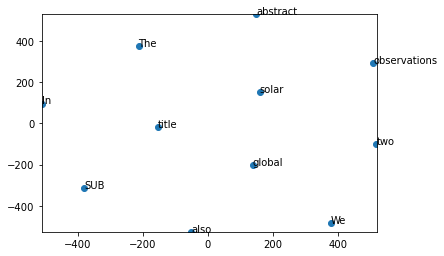

In [23]:
# Perform model visualisation
# numpy and pyplot allow for graphs
# TSNE visualises high-dimension data and finds probability distribution 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# DO: Replace /Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.model with 
# a local filepath or the variable dataset_cleaned_model

model_filename = '/Users/meganpowers/Desktop/HeliophysicsDatasetCleaned.model' # name for the saved trained model
print('loading the model ...')

# Open the model
model = Word2Vec.load(model_filename)

"""
    display_closestwords_tsnescatterplot
    params: model, word
    
    This function finds and plots the most closely
    related words based on TFIDF information
"""

def display_closestwords_tsnescatterplot(model, word):
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]
    
    # Use word vector to find the most similar words to the param word
    close_words = model.wv.most_similar(word)
    
    # Sum the vector for each of the closest words in the array
    arr = np.append(arr, np.array(model.wv.__getitem__([word])), axis=0)
    
    # For each TFIDF score, get the corresponding item
    # and append the label
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array(model.wv.__getitem__([word])), axis=0)
        
    # Create TSNE for high-dimension data to create the plot
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    # Display the corresponding scatterplot
    plt.scatter(x_coords, y_coords)
    
    # Create annotations for the different labels
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

# Test model using 'solar'
display_closestwords_tsnescatterplot(model, 'solar')

      0     1     2     3     4     5     6     7     8     9     ...  5636  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1803   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1804   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1805   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1806   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1807   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      5637  5638  5639  5640  5641  5642  5643  564

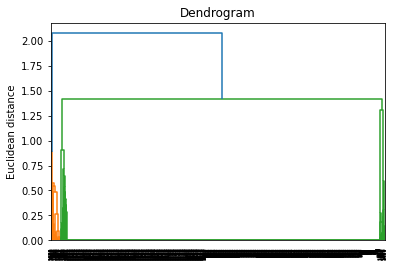

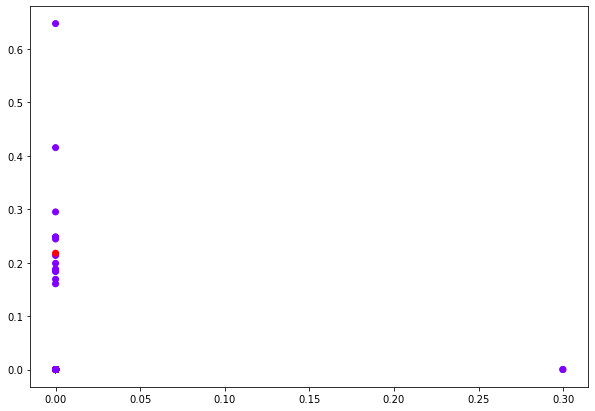

In [24]:
# Import clustering libraries to visualise closely
# related clusters of terms

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import pandas as pd


# DO: Replace /Users/meganpowers/Desktop/HeliophysicsDataset.txt with 
# a local filepath or the variable data_set

with open('/Users/meganpowers/Desktop/HeliophysicsDataset.txt') as f:
  content = f.read()

# Tokenize and vectorize the corpus to get closely related words
corpus = nltk.sent_tokenize(content)
vectorizer = TfidfVectorizer(stop_words='english')

# Turn the corpus into a data frame in order to allow for clustering
X = vectorizer.fit_transform(corpus)
df_text = pd.DataFrame(X.toarray())
print(df_text)

#Create the Agglomerative Clustering model

agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

# Predict labels for the clusters
labels = agg_clustering.fit_predict(X.toarray())

# A Linkage Matrix identifies relations between clusters
Z = linkage(X.toarray()[:,1:20], method = 'ward')

# A dendrogram displays the Euclidean distance between points - a small distance
# groups points into the same cluster, a higher one separates them

dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')

# Display the plots
plt.show()
plt.figure(figsize=(10, 7))
plt.scatter(X.toarray()[:,0], X.toarray()[:,1], c=agg_clustering.labels_, cmap='rainbow')

In [25]:

# Import libraries in order to perform K-Means clustering, where
# the results of the previous Agglomerative Clustering model
# reveal the ideal K number of clusters for K-means

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# DO: Replace /Users/meganpowers/Desktop/HeliophysicsDataset.txt with 
# a local filepath or the variable data_set

with open('/Users/meganpowers/Desktop/HeliophysicsDataset.txt') as f:
  content = f.read()

corpus = nltk.sent_tokenize(content)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

# Set the k number of clusters for K-means
true_k = 3

# Initialize the K-means clustering model, which clusters data into
# non-overlapping clusters to reveal similar terms

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
print("Top terms per cluster:")

# Initialize centroid points
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

# Print the top terms in each cluster
for i in range(true_k):
  print("Cluster %d:" % i),
  for ind in order_centroids[i, :10]:
    print(' %s' % terms[ind]),
  print()

Top terms per cluster:
Cluster 0:
 sub
 model
 models
 time
 observations
 results
 higher
 observed
 region
 climate

Cluster 1:
 sup
 ice
 high
 large
 sea
 data
 formation
 review
 surface
 scale

Cluster 2:
 title
 abstract
 bibcode
 2020georl
 mars
 climate
 2020ssrv
 216
 global
 2020jgre



In [26]:
"""
    get_entities
    param: sent
    return: ent1, ent2
    
    get_entities takes in a corpus by sentence and extracts entities by
    using Part of Speech tagging to get the subject and object of the sentence
    alongside their modifiers. It checks whether the subject is a Named Entity
    before returning the subject and object.

"""

############################################################# https://www.machinelearningplus.com/nlp/training-custom-ner-model-in-spacy/

def get_entities(sent):
    # Open the NER dataset in order to check the subject against entities within it
    contents = ""
    
    # DO: Replace /Users/meganpowers/Desktop/HeliophysicsDataset_NER.txt with 
    # a local filepath or the variable dataset_ner
    
    
    with open('/Users/meganpowers/Desktop/HeliophysicsDataset_NER.txt') as f:
        contents1 = f.read()
    
    # Initialize the subject and object to be returned
    ent1 = ""
    ent2 = ""
    
    # Initialize the dependency tag of the previous token as well as the previous token
    prv_tok_dep = ""    
    prv_tok_text = ""   
    
    # Initialize the prefix and modifier 
    prefix = ""
    modifier = ""
    
    # Save the potential subject and object dependency tags that may appear 
    SUBJECTS = ["nsubj", "nsubjpass", "csubj", "csubjpass", "agent", "expl"]
    OBJECTS = ["dobj", "dative", "attr", "oprd"]
   
    # For each individual word in a sentence
    for tok in nlp(sent):

        # Check if a token is a punctuation mark. If so, go to the next token.
        if tok.dep_ != "punct":
            
            # Check whether a token is a compound word so that modifiers can be
            # stored also.
            if tok.dep_ == "compound":
                prefix = tok.text
                
                # If the prior word was also compound, add the present word to the prior one
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " "+ tok.text
                    # Check if the token is in the stop list
                    if str(prv_tok_text).lower() in stop_words:
                        prefix = ""
                        
        # Check whether a token is a modifier. 
        if tok.dep_.endswith("mod") == True:
            modifier = tok.text
            
            # If the previous word was also a compound, add the current word to it.
            if prv_tok_dep == "compound":
                modifier = prv_tok_text + " "+ tok.text
                if str(prv_tok_text).lower() in stop_words:
                    modifier = ""
              
        # Check if the token dependency is either in a subject or object
        if tok.dep_ in SUBJECTS or tok.dep_ in OBJECTS:
            # If the token is a subject, check if it is a Named Entity (NE)
            if tok.dep_.find("subj") == True and str(tok) in contents1:
                tok_info = tok.text
                
                # Check if the token is in the stop list
                if str(tok_info).lower() in stop_words:
                    # Set it to an empty string
                    tok_info = ""
                # Build the subject using any modifiers and prefixes as well as the actual token
                ent1 = modifier +" "+ prefix + " "+ tok_info
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
            # If the token is an object
            if tok.dep_.find("obj") == True:
                # Set the token into to the text of the token 
                tok_info = tok.text 
                # Build the object using any modifiers and prefixes as well as the actual token
                ent2 = modifier + " " + prefix + " " + tok_info
        
        # Update the variables to reflect the previous token dependency
        # and previous token text
        prv_tok_dep = tok.dep_
        prv_tok_text = tok.text
        
    # Return the subject and object without leading whitespace.
    return [ent1.strip(), ent2.strip()]



In [27]:
entity_pairs = []
contents = ""

# Open the file with the heliophysics text

# DO: Replace /Users/meganpowers/Desktop/HeliophysicsDataset.txt with 
# a local filepath or the variable data_set


with open('/Users/meganpowers/Desktop/HeliophysicsDataset.txt') as f:
  contents = f.read()

# Tokenize the text by sentence
tokens = nltk.sent_tokenize(contents)

# For each sentence token, get entities 
for i in tokens:
    entity_pairs.append(get_entities(i))

print(entity_pairs[0:1000])

[['bibcode', ''], ['', 'CO2 climate experiments'], ['Here', '4.5 Intercomparison Project K'], ['insignificant  increase', 'low cloud coverage'], ['', ''], ['', 'plausibility'], ['', 'public coronavirus disease'], ['Wuhan NO2 decreases', ''], ['', 'limited health measures'], ['', 'TROPOMI COVID-19 place'], ['Environmental Monitoring', 'SUB>2.5</SUB surface >'], ['', ''], ['', ''], ['NO ozone', 'drastic  spread'], ['abstract Chinese Economic review', ''], ['review', 'solar cycle prediction bearing'], ['scope', 'further  amplitude'], ['', 'main Prediction groups'], ['', 'specified Precursor amplitude'], ['indeed', 'physical  insight'], ['based  approaches', ''], ['solar  activity', ''], ['therefore', 'itself'], ['', ''], ['One  method', 'predictions'], ['', ''], ['based  forecasts', 'proven  record'], ['abstract Blind surveY WALLABY', ''], ['', 'high radio interferometer'], ['WALLABY', '4 channel sensitivity'], ['', ''], ['signal  WALLABY', 'million  galaxies'], ['', 'spatial galaxy distr

In [28]:
# Import matcher to match the root of a sentence
from spacy.matcher import Matcher

"""
    get_relation
    param: sent
    return: span.text
    
    get_relation takes in a corpus one sentence at a time and 
    uses a Matcher object to determine the root of a sentence.
    This root, which is often a verb, is the 

"""

def get_relation(sent):
    doc = nlp(sent)
    # Matcher class object 
    matcher = Matcher(nlp.vocab)
    
    # Define the pattern to discover
    # a root
    pattern = [[{'DEP':'ROOT'}], 
               [{'DEP':'prep','OP':"?"}],
               [{'DEP':'ADV','OP':"?"}],
               [{'DEP':'agent','OP':"?"}],  
               [{'POS':'ADJ','OP':"?"}]]
    
    # Add the pattern to the matcher
    matcher.add("matching_1", pattern) 
    
    # Apply the matcher and determine
    # the total no of matches
    matches = matcher(doc)
    k = len(matches) - 1
    
    # Extract the root of the sentence using the Matcher
    span = doc[matches[k][1]:matches[k][2]] 
    
    # Return the text held in the span
    return(span.text)

In [29]:
# Apply get_relation to each sentence

relations = [get_relation(i) for i in tokens]

entity_pairs1 = entity_pairs

In [30]:
print(entity_pairs[0][0])

bibcode


In [31]:
# Ensure that no special characters
# are left in the entity pairs. Ensure no space as well.
# This is done to create valid RDF triple IRIs

for i in range(len(entity_pairs)):
    entity_pairs[i][0] = entity_pairs[i][0].replace(" ", "")
    entity_pairs[i][0]=re.sub("[^a-zA-Z0-9]+", '', entity_pairs[i][0])
    
    entity_pairs[i][1] = entity_pairs[i][1].replace(" ", "")
    entity_pairs[i][1]=re.sub("[^a-zA-Z0-9]+", '', entity_pairs[i][1])


In [32]:
# For each relation, if at least one part of the relation is blank,
# remove the relation.
# This is to avoid empty nodes in the KG

for i in range(len(relations)):
    if(entity_pairs[i][0] == "") or (entity_pairs[i][1] == ""):
        relations[i] = ""
    

# Ensure non-empty entities and relations

ent_list = [x for x in entity_pairs if (x[0] and x[1])]

relat_list = [x for x in relations if (x)]
"""

    ent_list[i][0] = ent_list[i][0].replace(" ", "+")
    
"""

# Replace any non-alphanumeric characters with empty space.

for i in range(len(ent_list)):
    ent_list[i][0]=re.sub("[^a-zA-Z0-9]+", '', ent_list[i][0])
    
    ent_list[i][1]=re.sub("[^a-zA-Z0-9]+", '', ent_list[i][1])

for i in range(len(relat_list)):
    relat_list[i]=re.sub("[^a-zA-Z0-9]+", '', relat_list[i])

# Ensure that the lists are of the same length
print(len(ent_list))
print(len(relat_list))

581
581


In [33]:
# Check to see the relations and how many examples of
# each there are.

pd.Series(relat_list).value_counts()[:50]

of               60
in               38
to               23
by               20
on               17
for              12
global           11
high             10
from             10
at               10
with              9
between           8
future            7
as                6
other             5
within            5
different         5
mean              5
necessary         4
around            4
upper             4
available         4
strong            4
thermal           4
into              4
larger            4
solar             4
polar             4
above             3
relevant          3
late              3
early             3
higher            3
stratospheric     3
tidal             3
over              3
atmospheric       3
central           3
limited           3
cold              3
low               3
during            3
30                3
including         3
significant       3
boundary          3
triple            2
ensemble          2
aboard            2
able              2


In [35]:
tokEnts = {}

# Extract all corresponding labels for each entity 
# in order to annotate the resulting ontology with
# the labels that correspond to Classes

for tok in nlp(contents):
    SUBJECTS = ["nsubj", "nsubjpass", "csubj", "csubjpass", "agent", "expl"]
    OBJECTS = ["dobj", "dative", "attr", "oprd"]
    if tok.dep_ in SUBJECTS or tok.dep_ in OBJECTS:
        if str(tok).lower() not in stop_words:
            curr_tok = str(tok)
            tokEnts[curr_tok] = ''

# Store each entity as a key, and each label as a value in a dictionary

for entity in sp(contents).ents:
    ent1 = str(entity)
    for key, val in tokEnts.items():
        if key.lower() in ent1.lower():
            tokEnts[key] = str(entity.label_)



In [36]:

# Extract subject

source = [i[0] for i in ent_list]

# Extract object
target = [i[1] for i in ent_list]

# Create a dataframe that has the subject, object, relationship (source, target, edge)
# This will also be used to create RDF triples
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relat_list})

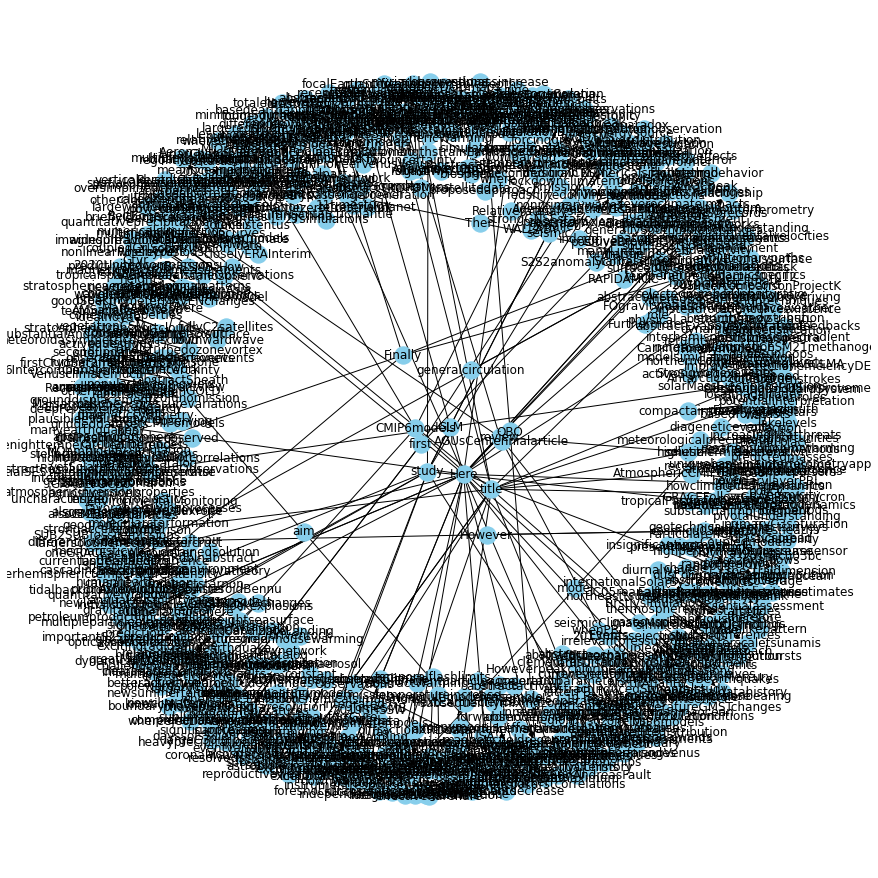

In [37]:
# create a directed-graph from the dataframe

G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(12,12))

# Display the Knowledge Graph
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

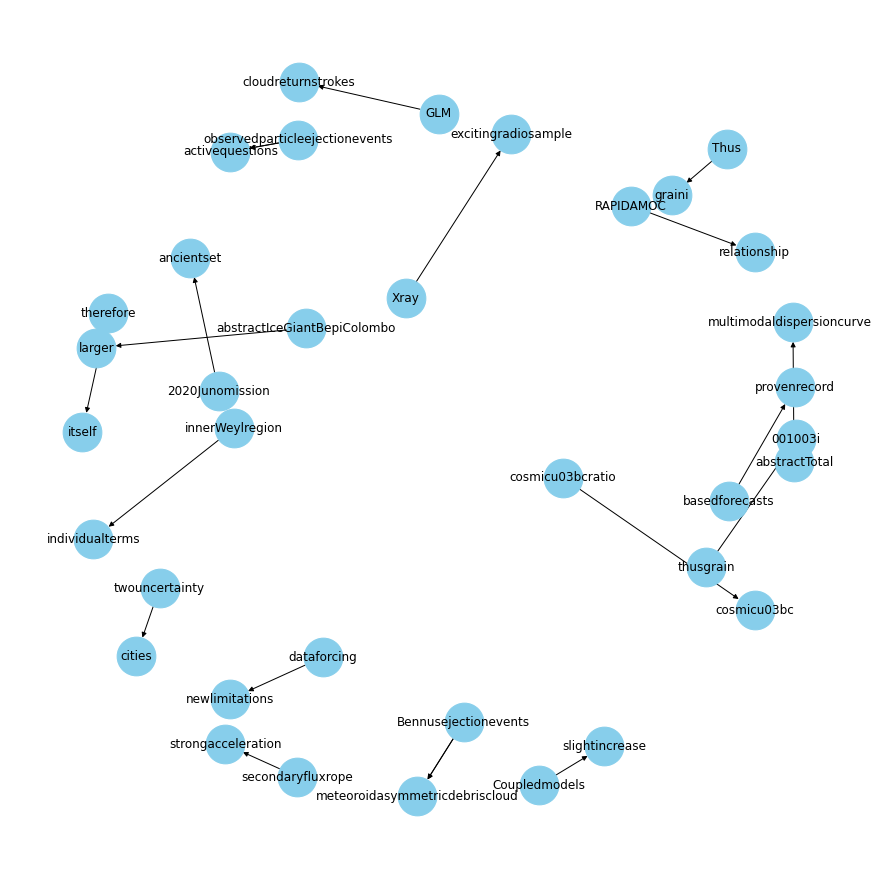

In [40]:
# The Knowledge Graph may be quite large. This allows for a 
# specifice edge value to be passed in, and displays 
# all sources and targets with the same edge value. 
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [42]:
# rdflib allows for Python to RDF conversion.
# This will be used to create the Protégé ontology.

import pandas as pd
from rdflib import Graph, URIRef, Literal
import rdflib
      
# Create a dataframe from the sources, targets, and edges

d = {
    "source": source,
    "target": target,
    "edge": relat_list,
}

# Create a graph to store RDF triples

g = rdflib.Graph()

# This value corresponds to a particular ontology namespace

# DO: Replace the namespace http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#
# with the destination namespace of the ontology that must be created to hold the
# results of this model. Protégé was used for the original model.


n = rdflib.Namespace("http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#")

df1 = pd.DataFrame(d)



In [43]:
# Create URIs from the entities and relationships by
# appending them to appropriate domain spaces

# DO: Replace the namespace http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#
# in namedIndividual with a default class represented in the ontology


namedIndividual = URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#ASTROPHYSICS')

rdftype = URIRef("http://www.w3.org/1999/02/22-rdf-syntax-ns#type")

rdfresource = URIRef("http://www.w3.org/1999/02/22-rdf-syntax-ns#subPropertyOf")

objectProperty = URIRef("http://www.w3.org/2002/07/owl#topObjectProperty")

classProperty = URIRef("http://www.w3.org/2002/07/owl#Thing")

# Initialize the Classes in the ontology

# DO: Replace the namespace classes with the classes that are modeled in the ontology

g.add((URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#ASTROPHYSICS'), rdflib.RDFS.subClassOf, classProperty))
g.add((URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#HELIOPHYSICS'), rdflib.RDFS.subClassOf, classProperty))
g.add((URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#PAPER'), rdflib.RDFS.subClassOf, classProperty))
g.add((URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#PROJECT'), rdflib.RDFS.subClassOf, classProperty))
g.add((URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#MISSION'), rdflib.RDFS.subClassOf, classProperty))
g.add((URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#PERSON'), rdflib.RDFS.subClassOf, classProperty))
g.add((URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#ORG'), rdflib.RDFS.subClassOf, classProperty))

# For each row in the dataframe
for index, row in df1.iterrows():
    # Add triple to rdf-graph
    # Classes added temporarily as placeholders 
    g.add((URIRef(n+row["source"]), rdftype, namedIndividual))
    g.add((URIRef(n+row["edge"]), rdflib.RDFS.subPropertyOf, objectProperty))
    g.add((URIRef(n+row["source"]), URIRef(n+row["edge"]), URIRef(n+row["target"])))


In [44]:
# Create variables for the different possible Class URIs
# Save the variables in a dictionary 


# DO: Replace these classes with the classes that are modeled in the ontology


astrophysics = URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#ASTROPHYSICS')
heliophysics = URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#HELIOPHYSICS')
mission = URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#MISSION')
paper = URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#PAPER')
project = URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#PROJECT')
org = URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#ORG')
person = URIRef('http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#PERSON')

# DO: Replace the namespace classes with the classes that are modeled in the ontology

classType ={
    "ASTROPHYSICS": astrophysics,
    "HELIOPHYSICS": heliophysics,
    "MISSION": mission,
    "PAPER": paper,
    "PROJECT": project,
    "ORG": org,
    "PERSON": person
    
}

# For every key and value in the dictionary that stores the tokens and labels

for key, value in tokEnts.items():
    
    # For every index and row in the dataframe that stores the RDF triple components
    for index, row in df1.iterrows():
        
        # Check if the key is a source or target value
        # Then, save the corresponding URI to the graph
        if key in row["source"]:
            if value in classType.keys():
                currURI = classType[value]
                g.add((URIRef(n+row["source"]), rdftype, currURI))
                break
        if key in row["target"]:
            if value in classType.keys():
                currURI = classType[value]
                g.add((URIRef(n+row["target"]), rdftype, currURI))
                break


In [45]:

# Finally, write the graph to the ontology using an appropriate address.

# DO: Replace the output address /Users/meganpowers/Desktop/CfHATest.owl 
# with an appropriate local address or final_address

final_address = input("Enter the name of the destination address for the ontology.")

output_address ="/Users/meganpowers/Desktop/CfHATest.owl"   
print(g.serialize())
g.serialize(destination = output_address)

@prefix ns1: <http://www.semanticweb.org/meganpowers/ontologies/2022/7/CfHATest#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ns1:1 rdfs:subPropertyOf owl:topObjectProperty .

ns1:100yearevent a ns1:ASTROPHYSICS ;
    ns1:low ns1:10 .

ns1:11timestudy a ns1:ASTROPHYSICS ;
    ns1:stratospheric ns1:prediction .

ns1:19 a ns1:ASTROPHYSICS ;
    ns1:environmental ns1:relationships .

ns1:20 rdfs:subPropertyOf owl:topObjectProperty .

ns1:2000 a ns1:ASTROPHYSICS ;
    ns1:at ns1:catalog .

ns1:2013massejectionplanets a ns1:ASTROPHYSICS ;
    ns1:within ns1:2013massejectionMercury .

ns1:2017 rdfs:subPropertyOf owl:topObjectProperty .

ns1:2019SHSSW a ns1:ASTROPHYSICS ;
    ns1:early ns1:downwardimpact .

ns1:2020Junomission a ns1:ASTROPHYSICS ;
    ns1:by ns1:ancientset .

ns1:21CESM2 a ns1:ASTROPHYSICS,
        ns1:PROJECT ;
    ns1:to ns1:dynamicicesheetgeometry .

ns1:21stmodels a ns1:ASTROPHYSICS ;
    ns1:between ns1:clear

<Graph identifier=N19f9d19686f24b8a9e0c0cbce4e22724 (<class 'rdflib.graph.Graph'>)>

In [111]:


# DO: Replace the file name CfHATest.owl with the file name of the ontology or
# the variable final_filename


final_filename = input("Enter the filename of the ontology file.")

with open ("CfHATest.owl") as a:
    print(a)

<_io.TextIOWrapper name='CfHATest.owl' mode='r' encoding='UTF-8'>
